In [2]:
from sklearn.manifold import TSNE, Isomap
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import umap
import umap.plot
from umap import UMAP
import numpy as np
from sklearn.datasets import fetch_rcv1
from sklearn.datasets import fetch_20newsgroups

c:\users\asrock\desktop\studia\ds\sem1\wdzd\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def plot_2d_mnist_scatter(X, y):
    fig, plot = plt.subplots()
    fig.set_size_inches(16, 16)
    plt.prism()
    for i in range(10):
        digit_indices = (y == i)
        dim0 = X[digit_indices, 0]
        dim1 = X[digit_indices, 1]
        plot.scatter(dim0, dim1, label=f"Digit {i}")
    plot.set_xticks(())
    plot.set_yticks(())
    plt.tight_layout()
    plt.legend()
    plt.show()

In [3]:
df_mnist = pd.read_csv('mnist.csv', header=None)

In [4]:
df_mnist_short = df_mnist.loc[:5000, :]

In [5]:
X_mnist = df_mnist_short.iloc[:, :-1]
y_mnist = df_mnist_short.iloc[:, -1]

In [6]:
mnist_tsne = TSNE(n_components=2, perplexity=40).fit_transform(X_mnist)

c:\users\asrock\desktop\studia\ds\sem1\wdzd\venv\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\users\asrock\desktop\studia\ds\sem1\wdzd\venv\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


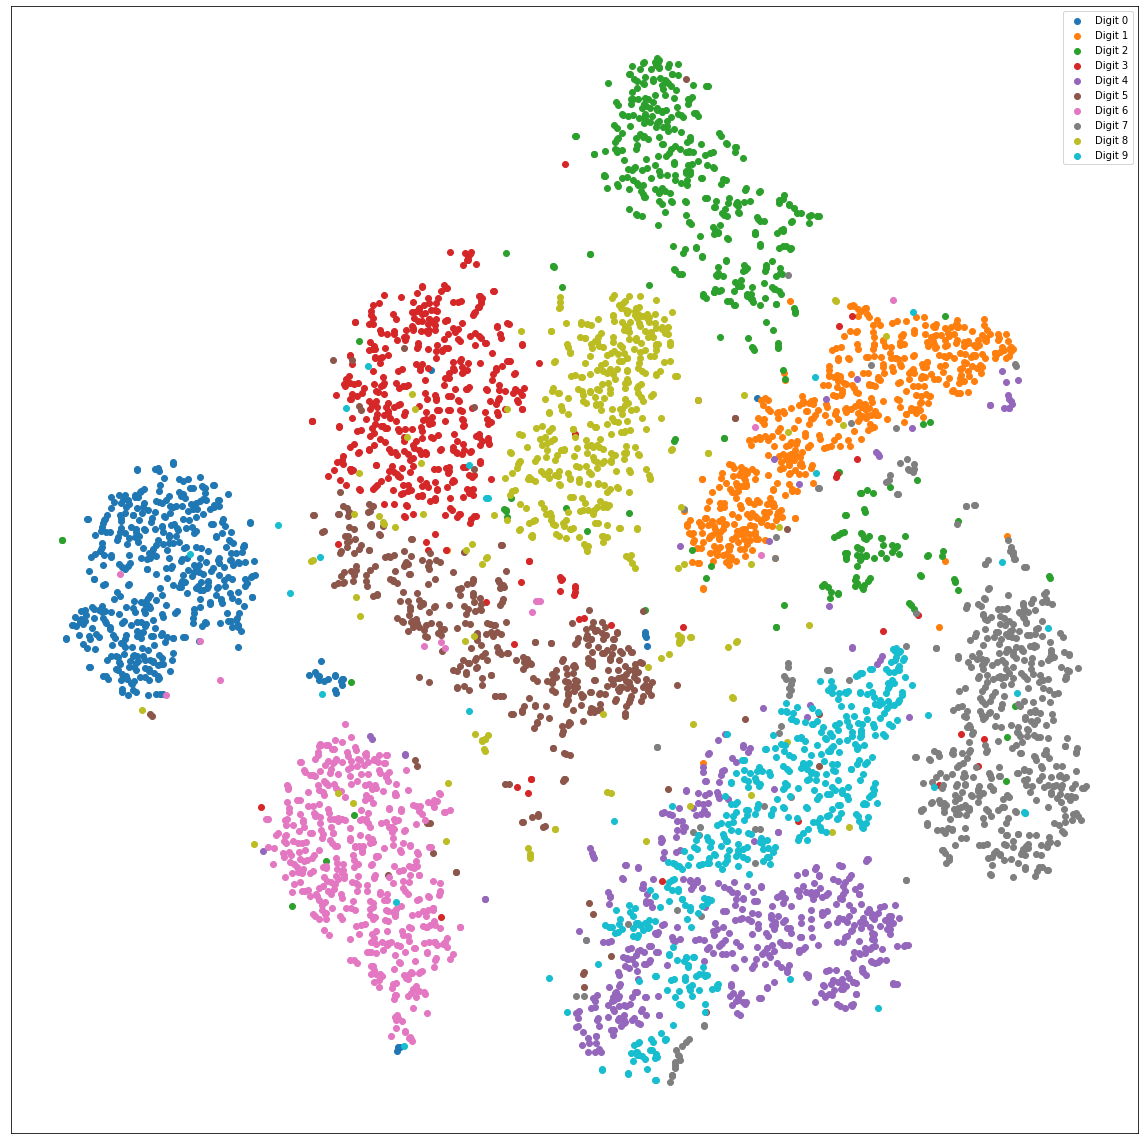

In [7]:
plot_2d_mnist_scatter(mnist_tsne, y_mnist)

In [8]:
mnist_umap_reducer=UMAP()
mnist_umap=mnist_umap_reducer.fit_transform(X_mnist)

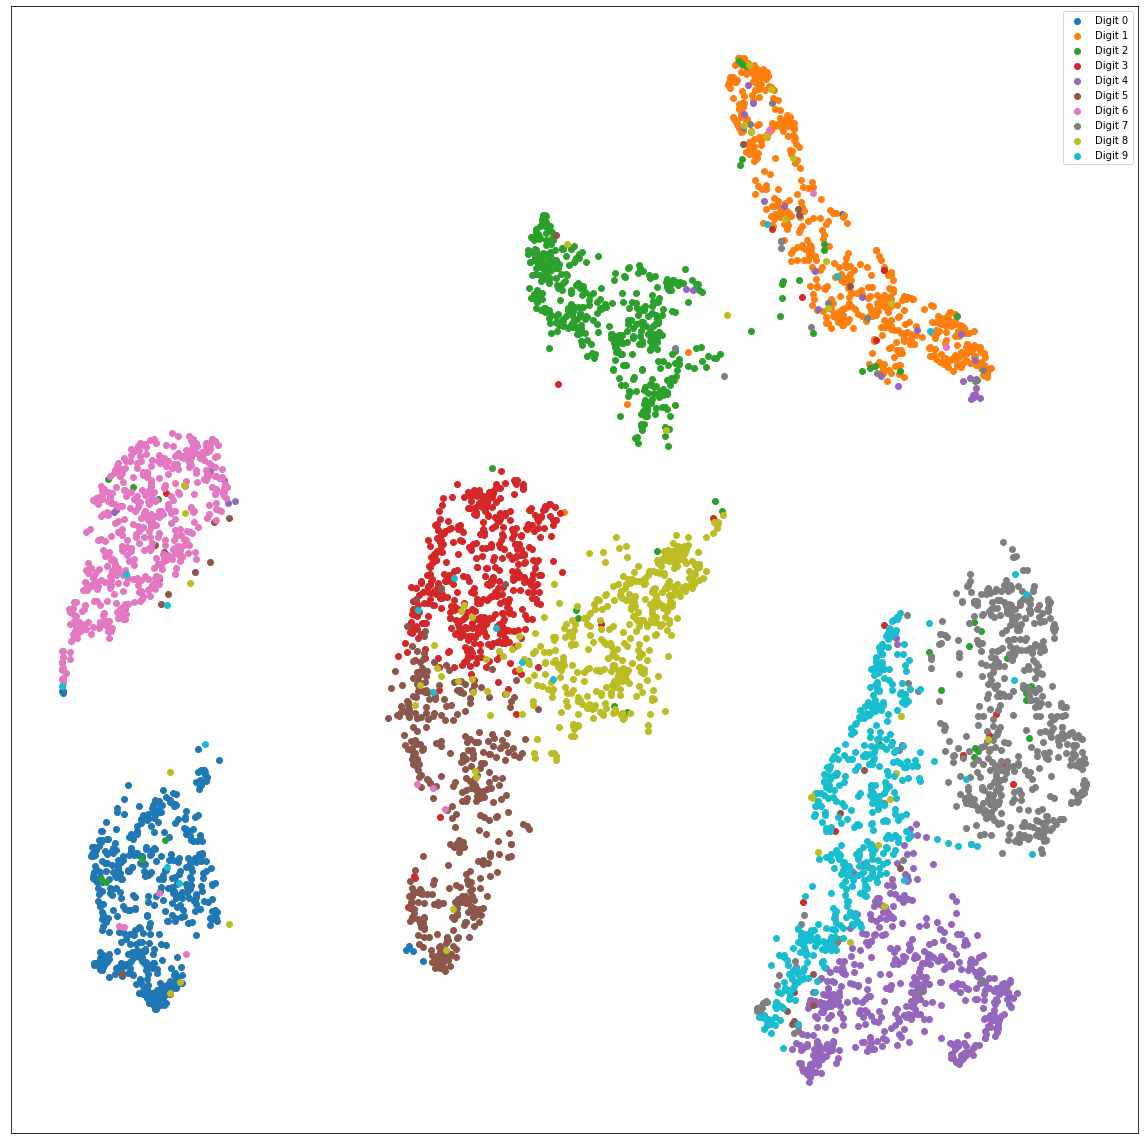

In [9]:
plot_2d_mnist_scatter(mnist_umap, y_mnist)

In [10]:
mnist_isomap_embedding = Isomap(n_components=2)
mnist_isomap = mnist_isomap_embedding.fit_transform(X_mnist)

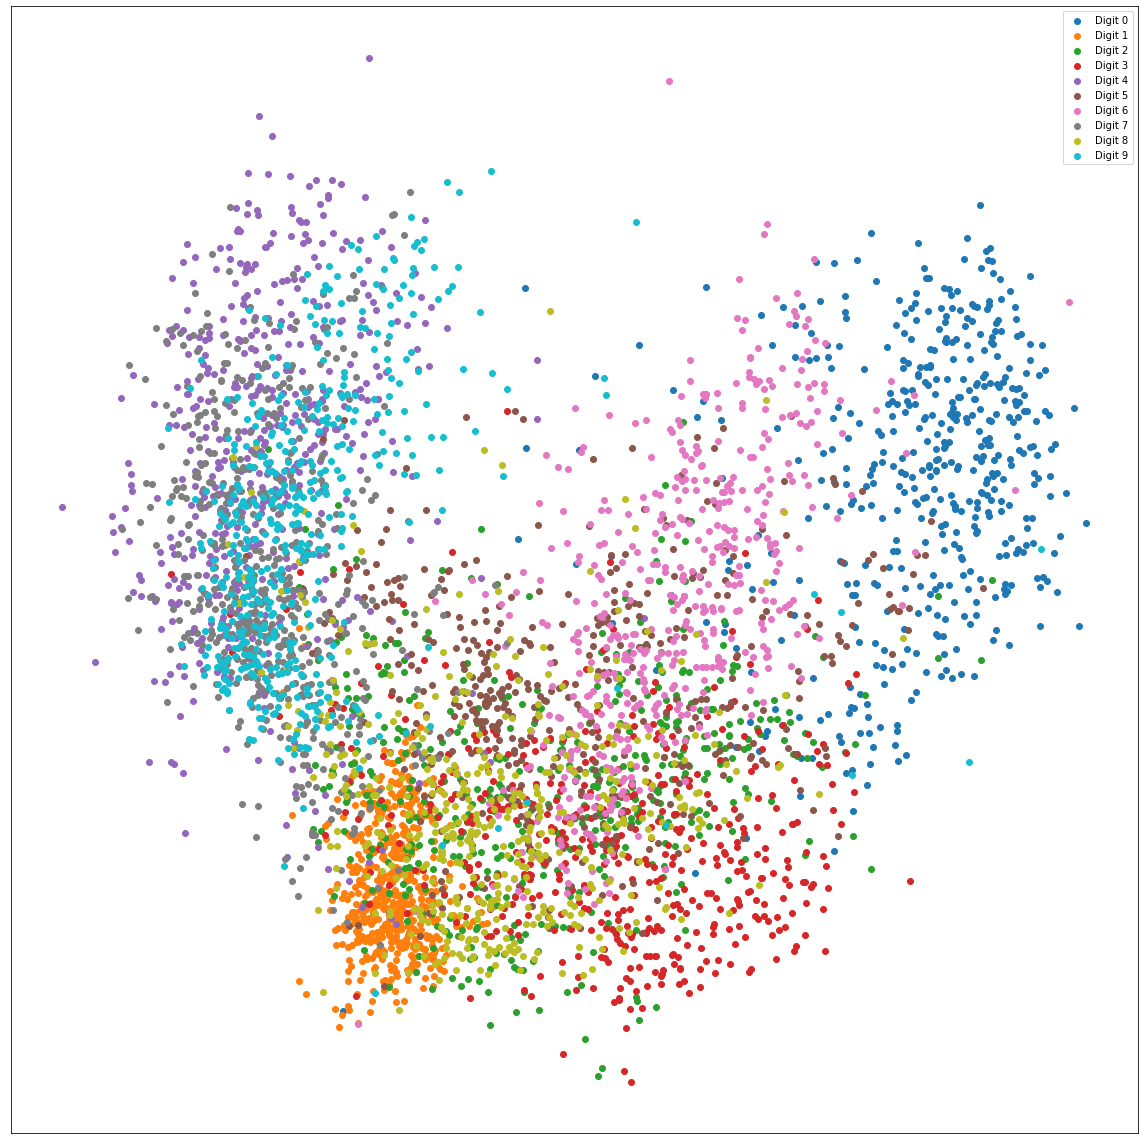

In [11]:
plot_2d_mnist_scatter(mnist_isomap, y_mnist)

## Reuters

In [15]:
df_reuters = pd.read_csv('reuters_reduced.csv', header=None)
df_reuters_short = df_reuters.loc[:5000, :]
X_reuters = df_reuters_short.iloc[:, :-1]
y_reuters = df_reuters_short.iloc[:, -1]

In [19]:
reuters_tsne = TSNE(n_components=2, perplexity=40).fit_transform(X_reuters)

c:\users\asrock\desktop\studia\ds\sem1\wdzd\venv\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\users\asrock\desktop\studia\ds\sem1\wdzd\venv\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [55]:
def plot_2d_reuters_scatter(X, y):
    #cm = plt.get_cmap('Spectral')
    fig, plot = plt.subplots()
    fig.set_size_inches(16, 16)
    #plt.prism()
    #plot.set_prop_cycle('color', [cm(1.*i/24) for i in range(24)])
    for i in y.unique():
        digit_indices = (y == i)
        dim0 = X[digit_indices, 0]
        dim1 = X[digit_indices, 1]
        plot.scatter(dim0, dim1, label=f"Digit {i}", color=np.random.rand(3,))
    plot.set_xticks(())
    plot.set_yticks(())
    plt.tight_layout()
    plt.legend()
    plt.show()

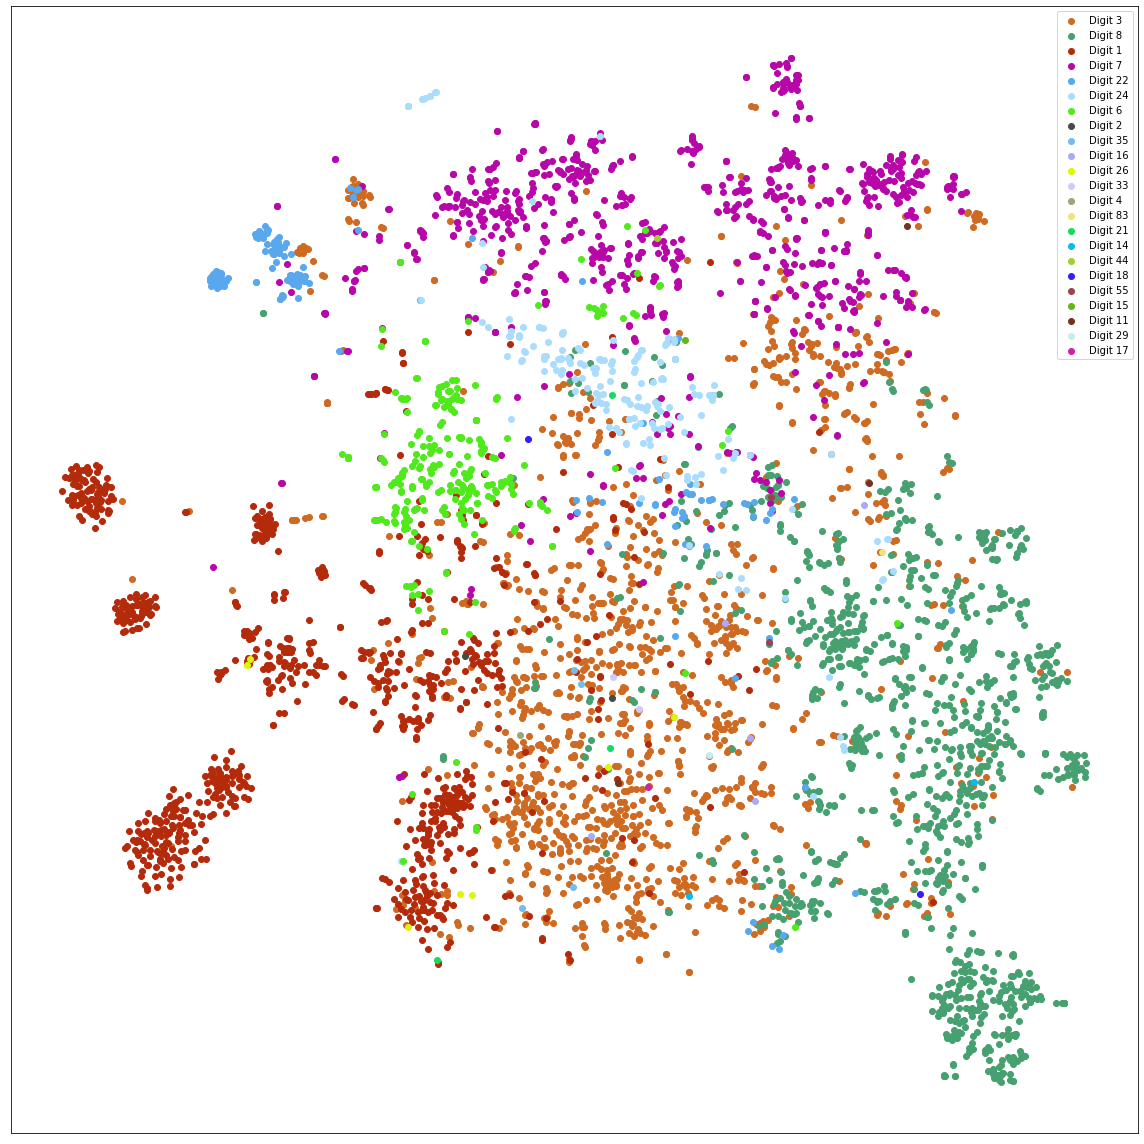

In [56]:
plot_2d_reuters_scatter(reuters_tsne, y_reuters)

In [32]:
reuters_umap_reducer=UMAP()
reuters_umap=reuters_umap_reducer.fit_transform(X_reuters)

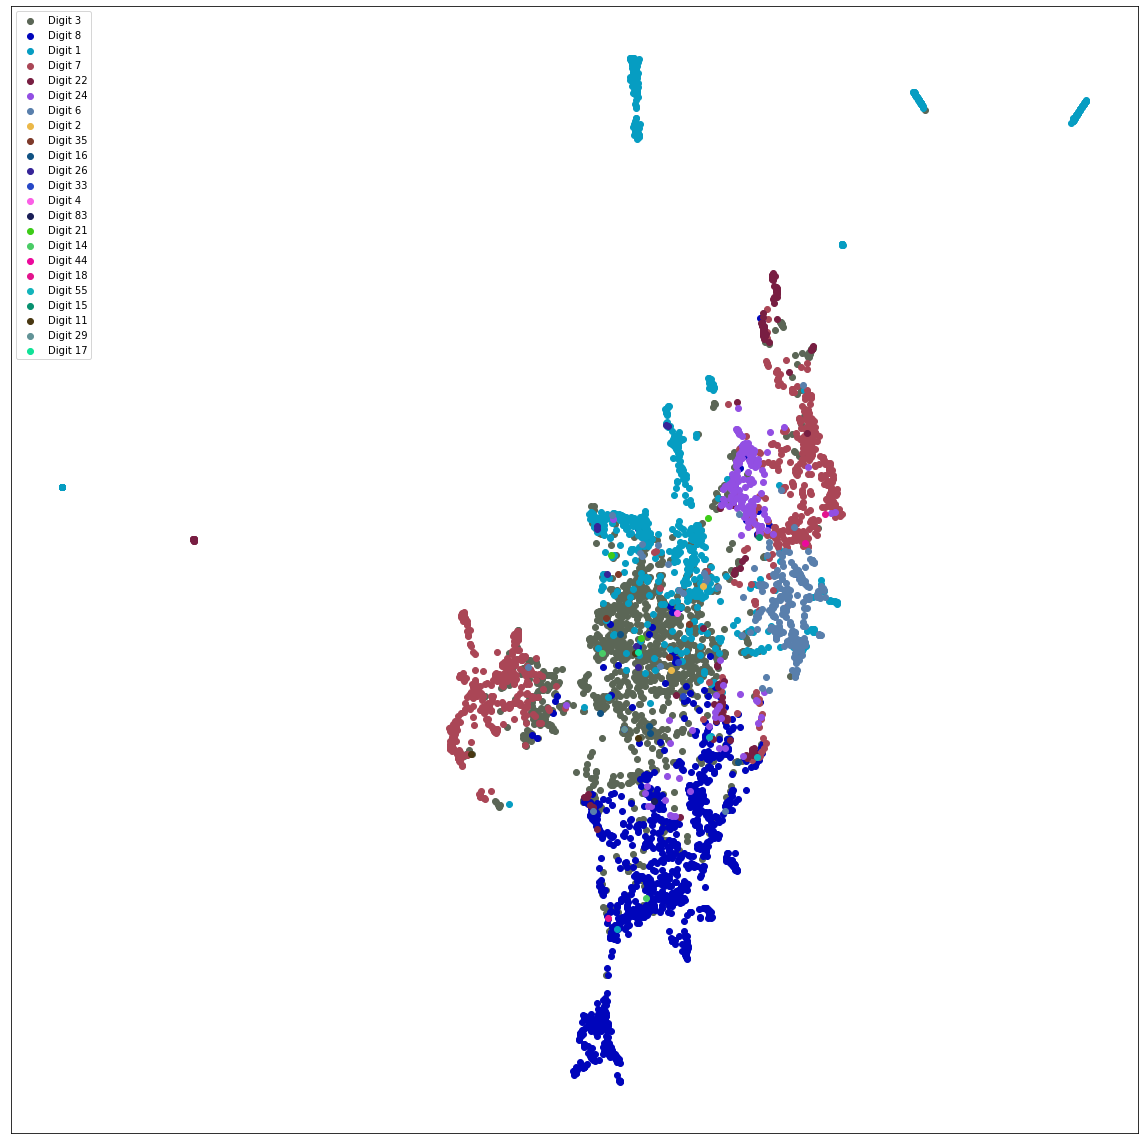

In [59]:
plot_2d_reuters_scatter(reuters_umap, y_reuters)

In [60]:
reuters_isomap_embedding = Isomap(n_components=2)
reuters_isomap = reuters_isomap_embedding.fit_transform(X_reuters)

c:\users\asrock\desktop\studia\ds\sem1\wdzd\venv\lib\site-packages\sklearn\manifold\_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\users\asrock\desktop\studia\ds\sem1\wdzd\venv\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\users\asrock\desktop\studia\ds\sem1\wdzd\venv\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\users\asrock\desktop\studia\ds\sem1\wdzd\venv\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_m

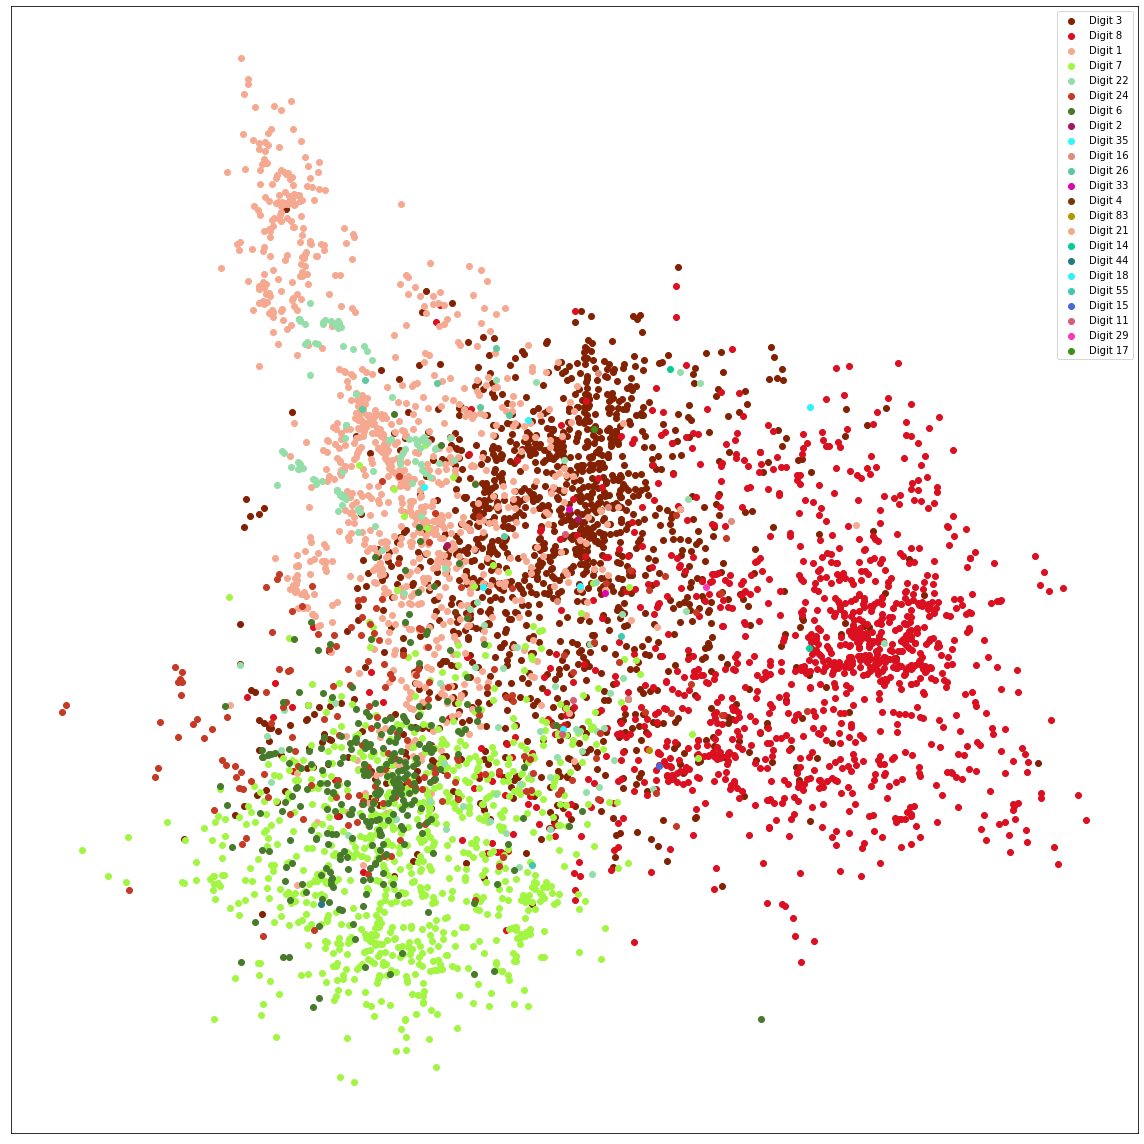

In [61]:
plot_2d_reuters_scatter(reuters_isomap, y_reuters)

# 20NG

Artykuł z embeddingiem 20NG z użyciem TSNE
https://towardsdatascience.com/clustering-the-20-newsgroups-dataset-with-gpt3-embeddings-10411a9ad150

In [35]:
df_20ng = pd.read_csv('tng.csv', header=None)
df_20ng_short = df_20ng
X_20ng = df_20ng_short.iloc[:, :-1]
y_20ng = df_20ng_short.iloc[:, -1]
NG20_original = fetch_20newsgroups(subset='all')
target_names=NG20_original.target_names

In [26]:
def plot_2d_20ng_scatter(X, y, target_names):
    #cm = plt.get_cmap('Spectral')
    fig, plot = plt.subplots()
    fig.set_size_inches(16, 16)
    #plt.prism()
    #plot.set_prop_cycle('color', [cm(1.*i/24) for i in range(24)])
    for i in y.unique():
        digit_indices = (y == i)
        dim0 = X[digit_indices, 0]
        dim1 = X[digit_indices, 1]
        plot.scatter(dim0, dim1, label=f"{target_names[i]}", color=np.random.rand(3,))
    plot.set_xticks(())
    plot.set_yticks(())
    plt.tight_layout()
    plt.legend()
    plt.show()

In [36]:
tng_tsne = TSNE(n_components=2, perplexity=15, learning_rate=200, random_state=42).fit_transform(X_20ng)

c:\users\asrock\desktop\studia\ds\sem1\wdzd\venv\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


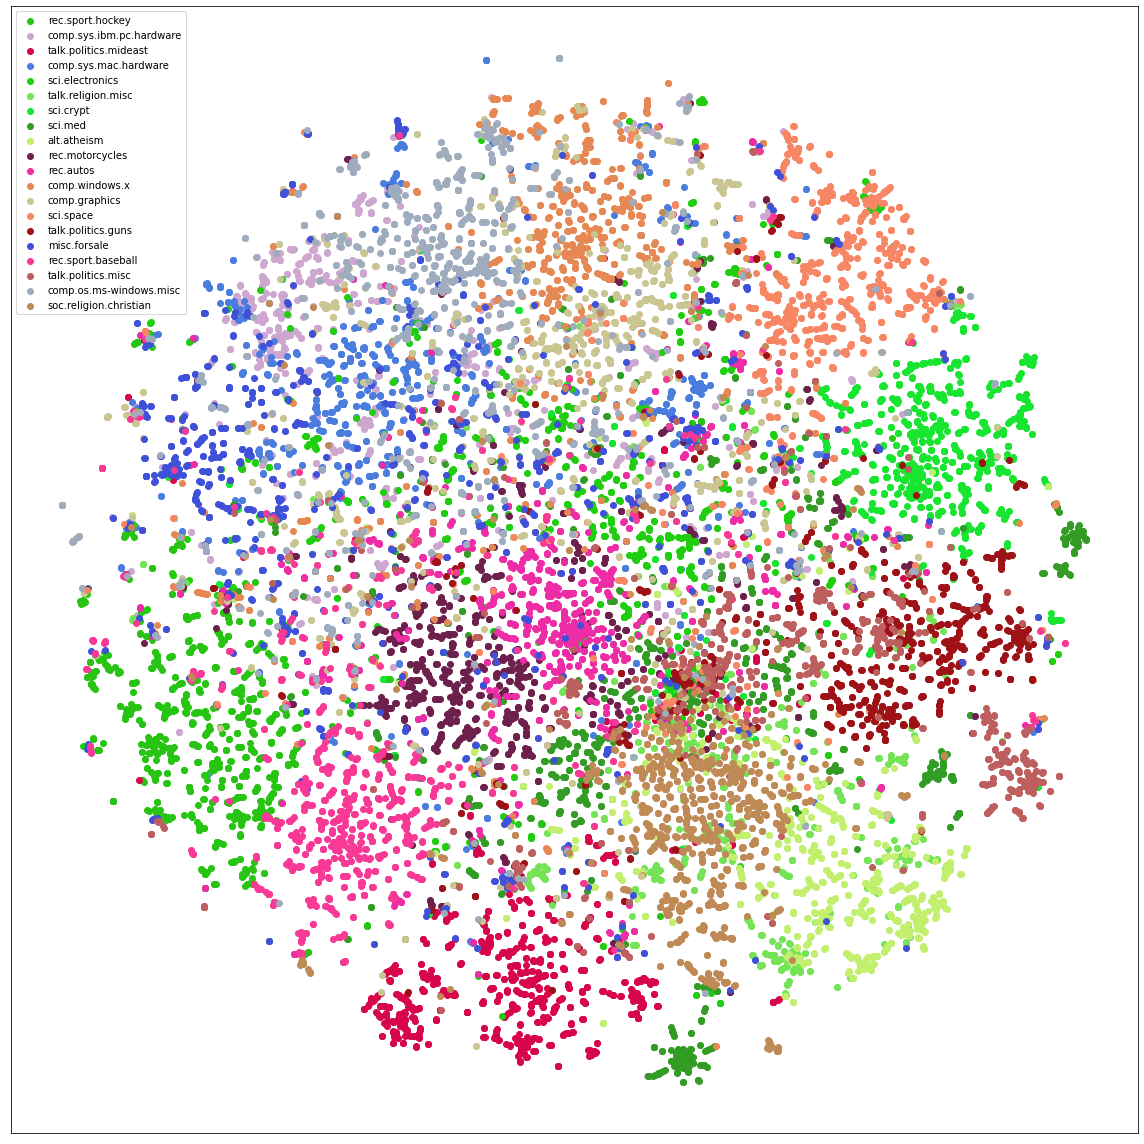

In [37]:
plot_2d_20ng_scatter(tng_tsne, y_20ng, target_names)

In [38]:
tng_umap_reducer=UMAP()
tng_umap=tng_umap_reducer.fit_transform(X_20ng)

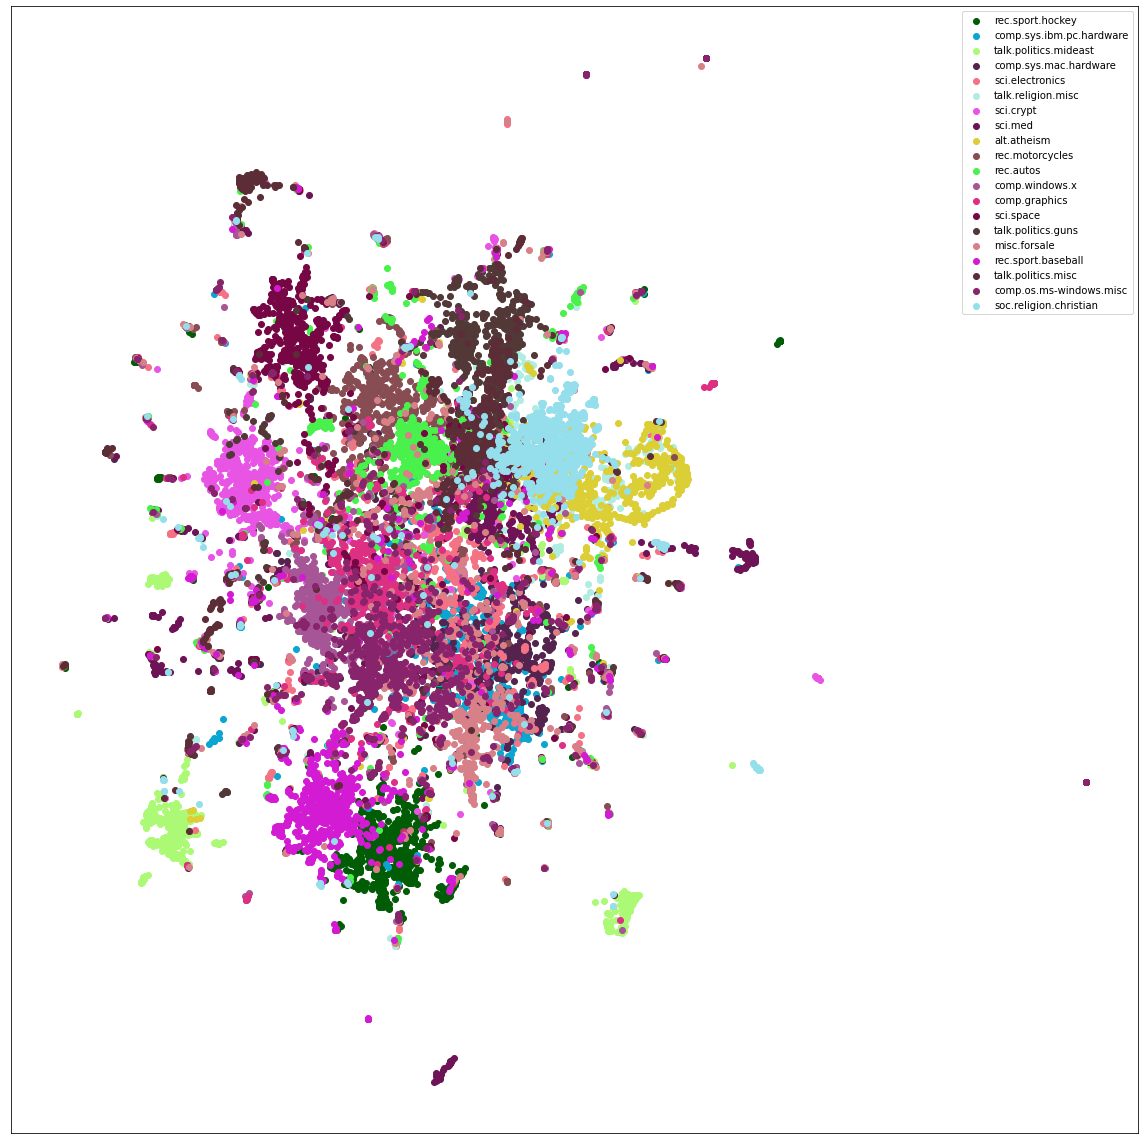

In [41]:
plot_2d_20ng_scatter(tng_umap, y_20ng, target_names)

In [43]:
tng_isomap_embedding = Isomap(n_components=2)
tng_isomap = tng_isomap_embedding.fit_transform(X_20ng)

c:\users\asrock\desktop\studia\ds\sem1\wdzd\venv\lib\site-packages\sklearn\manifold\_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\users\asrock\desktop\studia\ds\sem1\wdzd\venv\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\users\asrock\desktop\studia\ds\sem1\wdzd\venv\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\users\asrock\desktop\studia\ds\sem1\wdzd\venv\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_m

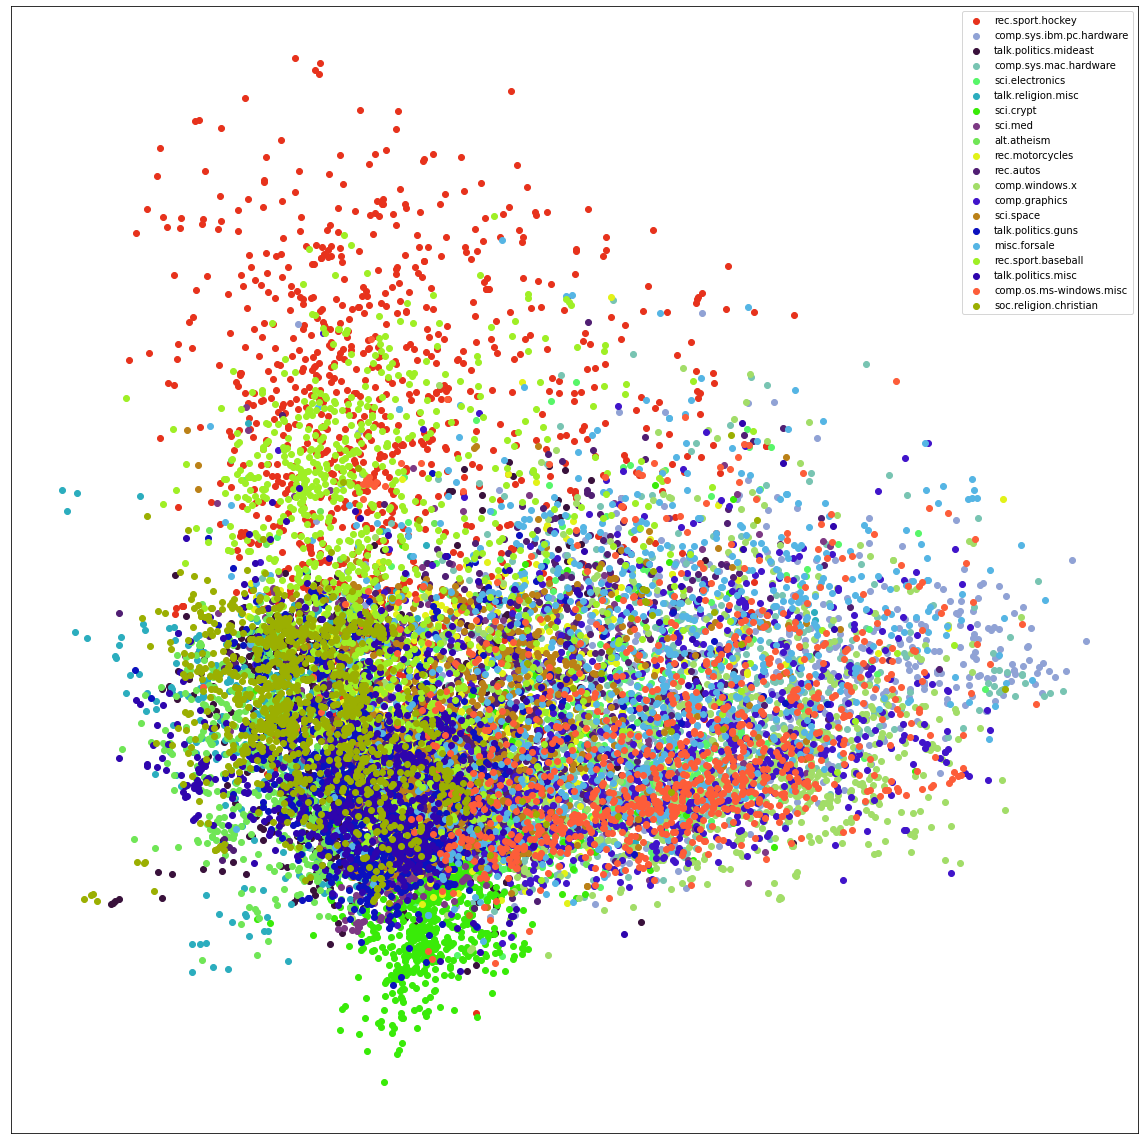

In [44]:
plot_2d_20ng_scatter(tng_isomap, y_20ng, target_names)